# Dependencies

In [1]:
pacman::p_load(igraph, graphlayouts, ggraph, ggforce, dplyr)

# Functions

In [2]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")

# Paths

In [3]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [4]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

all metadata

In [5]:
load(file = paste0(datapath,"capTCRseq/meta_div_TRB.RData"))

Warning message in load(file = paste0(datapath, "capTCRseq/meta_div_TRB.RData")):
"strings not representable in native encoding will be translated to UTF-8"


In [6]:
load(file = paste0(h4hpath, "analysis/GLIPH/GLIPH_input/gliphinput_int_adaptivetop1000_vdj.RData"))

In [7]:
#load(file = paste0(h4hpath, "analysis/GLIPH/GLIPH_input/gliphinput_int_adaptivetop1000_vdj_ab_dedup.RData"))

In [8]:
load(file = paste0(h4hpath, "analysis/GLIPH/gliph_rm_na_singlerm.RData"))

In [9]:
ls()

[1] "age_pal"                     "cohort_col"                 
 [3] "cycle_col"                   "datapath"                   
 [5] "gitpath"                     "gliph_rm_na_singlerm"       
 [7] "gliphinput_int_adaptive_vdj" "group_col"                  
 [9] "h4hpath"                     "manifestpath"               
[11] "meta_div"                    "myaxis"                     
[13] "myplot"                      "plotpath"                   
[15] "type_col"

In [10]:
gliph_rm_na_singlerm$index <- NULL
gliph_rm_na_singlerm$hla_score <- NULL

In [12]:
gliph_all <- merge(gliph_rm_na_singlerm, gliphinput_int_adaptive_vdj, by.x = "Sample", by.y = "subject:condition", all = F)

In [13]:
dim(gliph_all)

[1] 25448    24

In [15]:
save(gliph_all, file = paste0(datapath, "GLIPH/gliph_all.RData"))

# Communities of GLIPH specificity groups

In [7]:
load(file = paste0(datapath, "GLIPH/gliph_all.RData"))

Make an incidence matrix

In [19]:
dim(gliph_all)

[1] 25448    24

In [17]:
gliph_data_matrix_df <- as.data.frame.matrix(table(gliph_all %>% select(type , TcRb)))

In [18]:
gliph_data_igrf <- igraph::graph_from_incidence_matrix(gliph_data_matrix_df, weighted = T )

In [20]:
V(gliph_data_igrf)$subject <- sapply(V(gliph_data_igrf)$name, function(x){
    gliph_all$subject[match(x, gliph_all$TcRb)]})

In [21]:
V(gliph_data_igrf)$subject[is.na(V(gliph_data_igrf)$subject)] <- sapply(V(gliph_data_igrf)$name[is.na(V(gliph_data_igrf)$subject)], function(x){
    gliph_all$subject[match(x, gliph_all$type)]
})

In [22]:
V(gliph_data_igrf)$cancergroup <- sapply(V(gliph_data_igrf)$subject, function(x){
    meta_div$cancergroup[match(x, meta_div$Patient)]
}
                                    )

In [23]:
gliph_data_igrf

IGRAPH f46c6f8 UNWB 12894 14251 -- 
+ attr: type (v/l), name (v/c), subject (v/c), cancergroup (v/c),
| weight (e/n)
+ edges from f46c6f8 (vertex names):
 [1] global-%A --CAAPALTF  global-%A --CAPAAVHF  global-%A --CARLAAFF 
 [4] global-%A --CASGADTF  global-%A --CASGAQYV  global-%A --CASIAFTF 
 [7] global-%A --CASKAAFF  global-%A --CASKAENF  global-%A --CASKASAF 
[10] global-%A --CASPAAFF  global-%A --CASPAQFF  global-%A --CASRAQHF 
[13] global-%A --CASSAAVG  global-%A --CASSAEYF  global-%A --CASSAGFF 
[16] global-%A --CASSASTF  global-%A --CASVATFF  global-%A --CATLAGQF 
[19] global-%A --CATQATHF  global-%A --CSAGALHF  global-%A --CSAKAGVF 
+ ... omitted several edges

In [24]:
neighbors(bipartite.projection(gliph_data_igrf)$proj1, "global-%A")

+ 6/820 vertices, named, from b41a973:
[1] global-G% global-K% global-P% global-Q% global-R% global-S%

In [25]:
myg <- (bipartite.projection(gliph_data_igrf)$proj1)

In [26]:
myg1 <- delete_vertices( myg, degree(myg) == 0)

In [27]:
myg1

IGRAPH 1075900 UNW- 510 707 -- 
+ attr: name (v/c), subject (v/c), cancergroup (v/c), weight (e/n)
+ edges from 1075900 (vertex names):
 [1] global-%A     --global-P%      global-%A     --global-G%     
 [3] global-%A     --global-K%      global-%A     --global-R%     
 [5] global-%A     --global-S%      global-%A     --global-Q%     
 [7] global-%AE    --global-T%E     global-%AE    --global-R%E    
 [9] global-%AE    --global-P%E     global-%AE    --global-S%E    
[11] global-%AG    --global-G%G     global-%AG    --global-S%G    
[13] global-%AG    --global-R%G     global-%AGTE  --global-R%GTE  
[15] global-%AGTE  --global-SA%TE   global-%DNTE  --global-SD%TE  
+ ... omitted several edges

In [28]:
myk <- cluster_louvain(myg1, resolution = 1, weights = NULL)

In [34]:
#myk <- cluster_edge_betweenness(myg1)


Warning message in cluster_edge_betweenness(myg1):
"At core/community/edge_betweenness.c:485 : Membership vector will be selected based on the lowest modularity score."
Warning message in cluster_edge_betweenness(myg1):
"At core/community/edge_betweenness.c:492 : Modularity calculation with weighted edge betweenness community detection might not make sense -- modularity treats edge weights as similarities while edge betwenness treats them as distances."


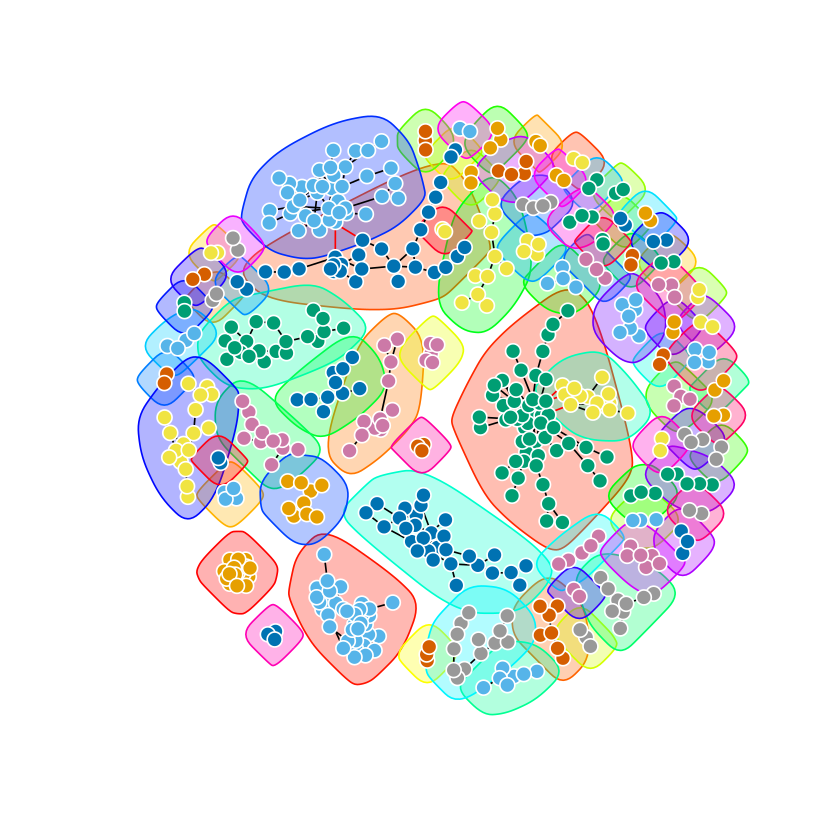

In [35]:
plot(myk, myg1, vertex.label=NA, vertex.frame.color="white", vertex.size=5)

In [36]:
V(myg1)$community <- as.character(myk$membership)

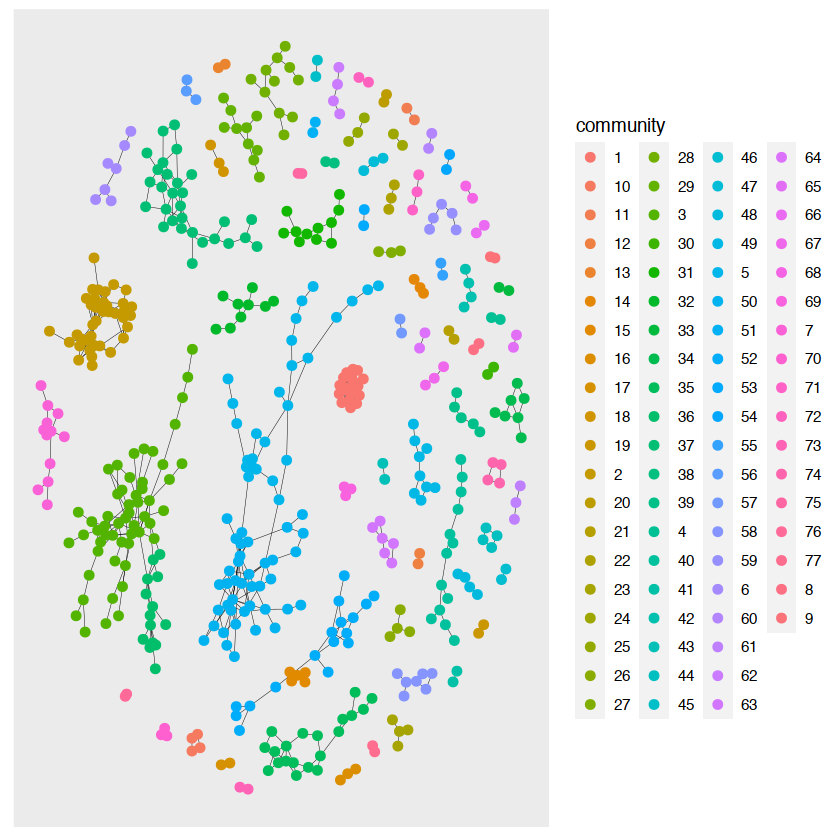

In [37]:
ggraph(myg1 , "fr", weights = NULL ) +
geom_edge_link(edge_width = 0.1, edge_colour = "#000000") + 
geom_node_point(aes(color = community), size = 2)

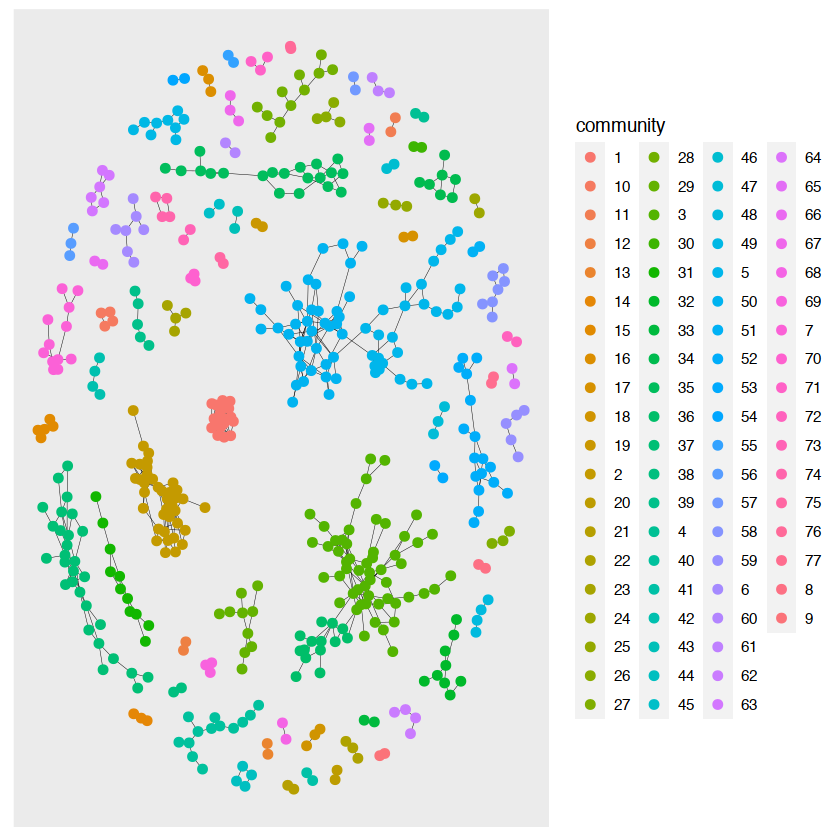

In [33]:
ggraph(myg1 , "fr", weights = NULL ) +
geom_edge_link(edge_width = 0.1, edge_colour = "#000000") + 
geom_node_point(aes(color = community), size = 2)a

# Communities of subjects based on their correlation

Make an sample x cluster frequency matrix 

In [430]:
mymat <- matrix(nrow = length(unique(gliph_meta_int$basename)), ncol = length(unique(gliph_meta_int$type)),
               dimnames = list(unique(gliph_meta_int$basename), unique(gliph_meta_int$type)))

In [431]:
for(s in unique(gliph_meta_int$basename)){
    mysample <- gliph_meta_int[ gliph_meta_int$basename == s,]
    mytab <- table(mysample$type)
    mymat[s,rownames(mytab)] <- mytab
}

In [434]:
dim(mymat)

[1] 265 257

In [438]:
summary(colSums(is.na(mymat)))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  218.0   258.0   262.0   259.6   264.0   264.0 

In [439]:
# keep clusters in at least two samples
mymat <- mymat[,colSums(is.na(mymat)) <= 263]

In [441]:
summary(rowSums(is.na(mymat)))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    149     177     181     179     183     184 

In [442]:
#keep samples with at least two clusters
mymat <- mymat[rowSums(is.na(mymat)) <= 182,]

In [443]:
dim(mymat)

[1] 195 184

In [444]:
# convert NA to 0
mymat[ is.na(mymat)] <- 0

In [525]:
# correlation
mycormat <- cor(t(mymat), method = "spearman")

### heatmap

In [561]:
# convert negative correlation to 0
mycormat[mycormat < 0] <- 0

In [562]:
library(ComplexHeatmap)

In [563]:
makematrix_4hm <- function(df, var, name ){
    mymat <- df[[var]]
names(mymat) <- df[["basename"]]
mymat <- t(as.matrix(mymat))
rownames(mymat) <- name
    
    return(mymat)
}

In [564]:
meta_div_orignal <- meta_div

In [565]:
meta_div <- meta_div[ !is.na(meta_div$basename),]

In [566]:
rownames(meta_div) <- (meta_div$basename)

In [568]:
meta_div <- meta_div[colnames(mycormat),]

In [569]:
dim(meta_div)

[1] 195  58

In [570]:
mycohort <- makematrix_4hm(meta_div, "Disease_type", "Cohort")
mycycle <- makematrix_4hm(meta_div, "cycle", "Cycle")
mysample <- makematrix_4hm(meta_div, "sampletype", "Sample type")
mygroup <- makematrix_4hm(meta_div, "cancergroup", "Cancer type")

In [575]:
cycle_col <- c("#bec2be", cycle_col)
names(cycle_col)[1] <- "X00"

In [576]:
group_col <- c("#bec2be","black", group_col)
names(group_col)[1] <- "Normal"
names(group_col)[2] <- "LFS"

In [578]:
cohort_hm <- Heatmap(mycohort, col = cohort_col, height = unit(1,"cm"))

cycle_hm <- Heatmap(mycycle, col = cycle_col, , height = unit(1,"cm"))

sample_hm <- Heatmap(mysample, col = type_col, , height = unit(1,"cm"))

group_hm <- Heatmap(mygroup, col = group_col, , height = unit(1,"cm"))

In [579]:
mypts <- makematrix_4hm(meta_div, "Patient", "Patient")

In [580]:
pts_hm <- Heatmap(mypts,  height = unit(1,"cm"), show_heatmap_legend = FALSE, show_column_names = FALSE)

In [582]:
hm <- Heatmap(mycormat, show_row_names = TRUE, row_names_gp = gpar(fontsize = 3))

The automatically generated colors map from the 1^st and 99^th of the
values in the matrix. There are outliers in the matrix whose patterns
might be hidden by this color mapping. You can manually set the color
to `col` argument.

Use `suppressMessages()` to turn off this message.



In [583]:
pdf(paste0(plotpath, "heatmap_clusters_int_LFS.pdf"), width = 10, height = 10)
hm %v% cohort_hm %v% cycle_hm %v% sample_hm %v% group_hm %v% pts_hm
dev.off()

pdf 
  2

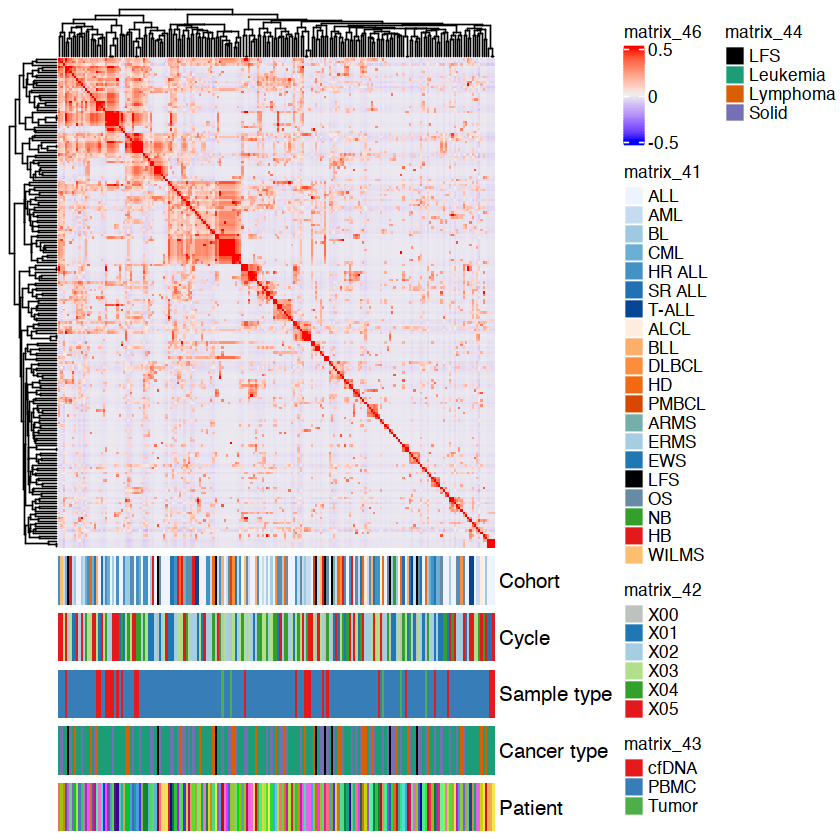

In [552]:
hm %v% cohort_hm %v% cycle_hm %v% sample_hm %v% group_hm %v% pts_hm